In [8]:
import pandas as pd
import os, sys
import numpy as np

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from utils import NnClass

In [9]:
df = pd.read_csv(os.path.join('..', 'database', 'meta', 'mini_train_data.csv'))

In [10]:
# Extract labels and pixel values
labels = df['label'].values.astype(np.int64)
features = df.drop(columns=['label']).values.astype(np.float32)
features /= 255.0
# features = features.reshape(-1, 1, 313, 224)


labels = pd.get_dummies(labels, columns=['Label'], dtype=int).values   #onehot encoding
print("features shape:", features.shape)
print("labels shape:", labels.shape)

features shape: (653, 70113)
labels shape: (653, 10)


In [11]:
trset,vset=NnClass.tv_split(df,0.8,semilla=99)

trFeatures = trset.drop(columns=['label']).values.astype(np.float32)
trFeatures /= 255.0
trLabels=trset["label"].values.astype(np.int64)
trLabels = pd.get_dummies(trLabels, columns=['Label'], dtype=int).values   #onehot encoding

vFeatures = vset.drop(columns=['label']).values.astype(np.float32)
vFeatures /= 255.0
vLabels=vset["label"].values.astype(np.int64)
vLabels = pd.get_dummies(vLabels, columns=['Label'], dtype=int).values   #onehot encoding

fcnn=NnClass.Nn(trainX=trFeatures, trainY=trLabels,m=[512, 128, 32],seed=99)

Epoch 1/11 - Train Loss: 5.7405 - Val Loss: 5.6365
Epoch 6/11 - Train Loss: 0.5316 - Val Loss: 1.5952
Epoch 11/11 - Train Loss: 0.2555 - Val Loss: 1.4376


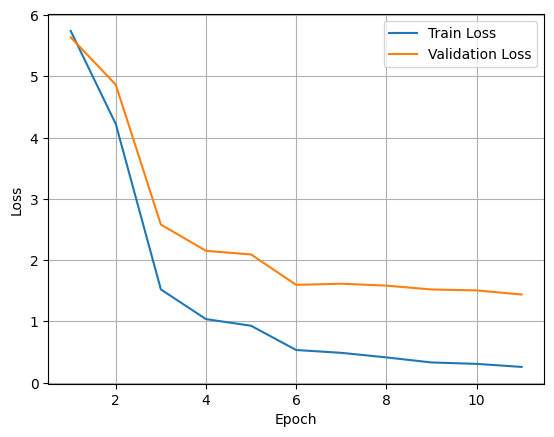

In [12]:
fcnn.trainUltimate(
    epochs=11,
    lr=0.001,
    batch_size=32,
    optimizer='adam',
    l2_lambda=1e-4,
    valX=vFeatures,
    valy=vLabels,
    early_stopping=True,
    patience=10,
    eval_interval=5,
    lr_schedule={'type': 'exponential', 'decay': 0.95}
)

In [17]:
# vPreds is a tuple: (all_layers_outputs, all_layers_activations)
# The final predictions are usually the last element of the first tuple/list
vPreds = fcnn.ff(vFeatures)
# Get the final output (probabilities or logits)
if isinstance(vPreds, (tuple, list)):
	# Try to get the last element of the first tuple/list
	preds = vPreds[0][-1] if isinstance(vPreds[0], (tuple, list, np.ndarray)) else vPreds[-1]
else:
	preds = vPreds

print(vFeatures.shape)
print(preds.shape)
print(vLabels.shape)
accuracy = np.mean(np.argmax(preds, axis=1) == np.argmax(vLabels, axis=1))
print("Validation accuracy:", accuracy)

(130, 70113)
(130, 10)
(130, 10)
Validation accuracy: 0.5384615384615384
